## **1. Monthly champagne sales millions – Time series Analysis (1.0 điểm)**
- Tạo tập tin: question_1.ipynb (toàn bộ code của câu 1 sẽ được viết trong file này)
- Cho dữ liệu champagne_new.xlsx là dữ liệu bán champagne theo thời gian từ tháng 01-1964 đến tháng 09-1972
- Yêu cầu:
1. Đọc dữ liệu
2. Xem thông tin chung từ dữ liệu: head(), số dòng, số cột, str()...
3. Chuyển dữ liệu này thành Time Series object => in Time Series object.
4. Vẽ Time Series object vừa tạo.
5. Thực hiện việc decompostition, nhận xét.
6. Thực hiện việc dự báo và vẽ biểu đồ so sánh với thực tiễn.
7. Dự đoán số tiền champagne bán được của 9 tháng tiếp theo từ tháng 10-1972 đến
tháng 06-1973.

In [1]:
# https://docs.google.com/spreadsheets/d/1onqCtvYtcjZw1dGS-WeQwAcgFIJvQCxw/edit?usp=sharing&ouid=104180524113719176444&rtpof=true&sd=true
system('gdown --id 1onqCtvYtcjZw1dGS-WeQwAcgFIJvQCxw')

In [4]:
install.packages("xlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’




In [5]:
library(tidyverse)
library(xlsx)

### **1. Đọc dữ liệu**

In [39]:
df = read.xlsx('champagne_new.xlsx', sheetIndex = 1)

In [ ]:
### **2. Xem thông tin chung từ dữ liệu: head(), số dòng, số cột, str()...**

In [40]:
print(paste('number of rows: ', dim(df)[1]))
print(paste('number of columns: ', dim(df)[2]))

[1] "number of rows:  105"
[1] "number of columns:  2"


In [11]:
head(df)
tail(df)
summary(df)
str(df)

,Month,monthly_champange
,<date>,<dbl>
1,1964-01-01,2815
2,1964-02-01,2672
3,1964-03-01,2755
4,1964-04-01,2721
5,1964-05-01,2946
6,1964-06-01,3036


,Month,monthly_champange
,<date>,<dbl>
100,1972-04-01,4788
101,1972-05-01,4618
102,1972-06-01,5312
103,1972-07-01,4298
104,1972-08-01,1413
105,1972-09-01,5877


     Month            monthly_champange
 Min.   :1964-01-01   Min.   : 1413    
 1st Qu.:1966-03-01   1st Qu.: 3113    
 Median :1968-05-01   Median : 4217    
 Mean   :1968-05-01   Mean   : 4761    
 3rd Qu.:1970-07-01   3rd Qu.: 5221    
 Max.   :1972-09-01   Max.   :13916    

'data.frame':	105 obs. of  2 variables:
 $ Month            : Date, format: "1964-01-01" "1964-02-01" ...
 $ monthly_champange: num  2815 2672 2755 2721 2946 ...


In [19]:
df$Month

[1] "1964-01-01" "1964-02-01" "1964-03-01" "1964-04-01" "1964-05-01"
  [6] "1964-06-01" "1964-07-01" "1964-08-01" "1964-09-01" "1964-10-01"
 [11] "1964-11-01" "1964-12-01" "1965-01-01" "1965-02-01" "1965-03-01"
 [16] "1965-04-01" "1965-05-01" "1965-06-01" "1965-07-01" "1965-08-01"
 [21] "1965-09-01" "1965-10-01" "1965-11-01" "1965-12-01" "1966-01-01"
 [26] "1966-02-01" "1966-03-01" "1966-04-01" "1966-05-01" "1966-06-01"
 [31] "1966-07-01" "1966-08-01" "1966-09-01" "1966-10-01" "1966-11-01"
 [36] "1966-12-01" "1967-01-01" "1967-02-01" "1967-03-01" "1967-04-01"
 [41] "1967-05-01" "1967-06-01" "1967-07-01" "1967-08-01" "1967-09-01"
 [46] "1967-10-01" "1967-11-01" "1967-12-01" "1968-01-01" "1968-02-01"
 [51] "1968-03-01" "1968-04-01" "1968-05-01" "1968-06-01" "1968-07-01"
 [56] "1968-08-01" "1968-09-01" "1968-10-01" "1968-11-01" "1968-12-01"
 [61] "1969-01-01" "1969-02-01" "1969-03-01" "1969-04-01" "1969-05-01"
 [66] "1969-06-01" "1969-07-01" "1969-08-01" "1969-09-01" "1969-10-01"
 [71] "1969-11-01" "1969-12-01" "1970-01-01" "1970-02-01" "1970-03-01"
 [76] "1970-04-01" "1970-05-01" "1970-06-01" "1970-07-01" "1970-08-01"
 [81] "1970-09-01" "1970-10-01" "1970-11-01" "1970-12-01" "1971-01-01"
 [86] "1971-02-01" "1971-03-01" "1971-04-01" "1971-05-01" "1971-06-01"
 [91] "1971-07-01" "1971-08-01" "1971-09-01" "1971-10-01" "1971-11-01"
 [96] "1971-12-01" "1972-01-01" "1972-02-01" "1972-03-01" "1972-04-01"
[101] "1972-05-01" "1972-06-01" "1972-07-01" "1972-08-01" "1972-09-01"

<font color = 'red'>**Nhận xét:**</font>
- dataset với các điểm thời gian đầy đủ, từ 1964-01-01 đến 1972-09-01, không bị khuyết tháng nào

### **3.Chuyển dữ liệu này thành Time Series object => in Time Series object.**

In [41]:
# Convert it to a time series object.
print("Bitrhs Time Series:")
df.timeseries <- ts(df$monthly_champange, start = c(1964,1), frequency = 12)

# Print the timeseries data.
df.timeseries

[1] "Bitrhs Time Series:"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1964,2815,2672,2755,2721,2946,3036,2282,2212,2922,4301,5764,7312
1965,2541,2475,3031,3266,3776,3230,3028,1759,3595,4474,6838,8357
1966,3113,3006,4047,3523,3937,3986,3260,1573,3528,5211,7614,9254
1967,5375,3088,3718,4514,4520,4539,3663,1643,4739,5428,8314,10651
1968,3633,4292,4154,4121,4647,4753,3965,1723,5048,6922,9858,11331
1969,4016,3957,4510,4276,4968,4677,3523,1821,5222,6872,10803,13916
1970,2639,2899,3370,3740,2927,3986,4217,1738,5221,6424,9842,13076
1971,3934,3162,4286,4676,5010,4874,4633,1659,5951,6981,9851,12670
1972,4348,3564,4577,4788,4618,5312,4298,1413,5877,,,


### **4. Vẽ Time Series object vừa tạo.**

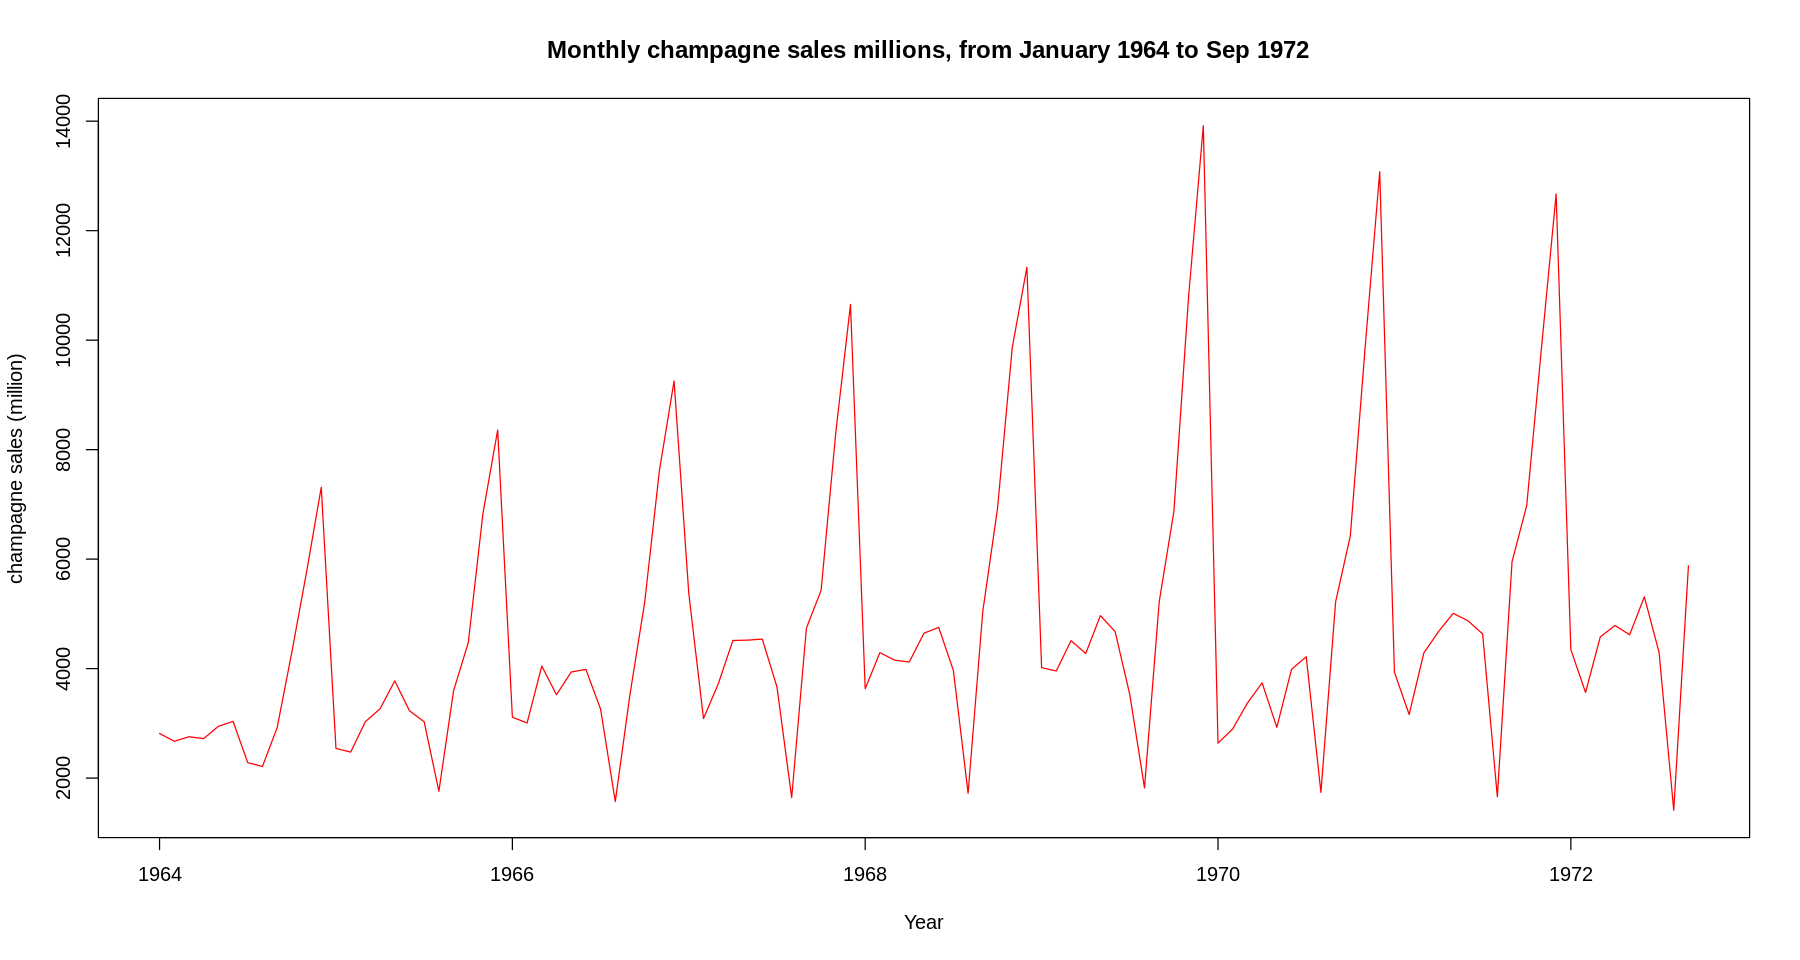

In [46]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot(df.timeseries, 
    main=' Monthly champagne sales millions, from January 1964 to Sep 1972',
    col='red',
    xlab='Year', ylab='champagne sales (million)'
)

<font color = 'red'>**Nhận xét:**</font>
- Từ 1965 - giữa năm 1969, data có xu hướng đi lên, tuy nhiên từ giữa năm 1969 đến giữa năm 1970, data có xu hướng đi xuống
sau đó, từ data lại có xu hướng đi lên. 
- Từ 1970 đến 1971, data có xu hướng đi ngang

- Chúng ta có thể thấy rằng có tính thời vụ (seasonality) trong dữ liệu, với các đỉnh lặp lại chính nó. Ngoài ra các đỉnh ngày càng cao hơn qua từng năm.


### **5. Thực hiện việc decompostition, nhận xét.**

In [30]:
comp = decompose(df.timeseries)

In [31]:
comp$x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1964,2815,2672,2755,2721,2946,3036,2282,2212,2922,4301,5764,7312
1965,2541,2475,3031,3266,3776,3230,3028,1759,3595,4474,6838,8357
1966,3113,3006,4047,3523,3937,3986,3260,1573,3528,5211,7614,9254
1967,5375,3088,3718,4514,4520,4539,3663,1643,4739,5428,8314,10651
1968,3633,4292,4154,4121,4647,4753,3965,1723,5048,6922,9858,11331
1969,4016,3957,4510,4276,4968,4677,3523,1821,5222,6872,10803,13916
1970,2639,2899,3370,3740,2927,3986,4217,1738,5221,6424,9842,13076
1971,3934,3162,4286,4676,5010,4874,4633,1659,5951,6981,9851,12670
1972,4348,3564,4577,4788,4618,5312,4298,1413,5877,,,


In [32]:
comp$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1964,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,965.7290,3730.1301,5919.9426
1965,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,965.7290,3730.1301,5919.9426
1966,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,965.7290,3730.1301,5919.9426
1967,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,965.7290,3730.1301,5919.9426
1968,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,965.7290,3730.1301,5919.9426
1969,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,965.7290,3730.1301,5919.9426
1970,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,965.7290,3730.1301,5919.9426
1971,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,965.7290,3730.1301,5919.9426
1972,-1223.4116,-1624.2501,-979.2293,-850.2449,-652.0961,-671.1735,-1242.5001,-3060.5053,-312.3907,,,


In [33]:
comp$trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1964,NA,NA,NA,NA,NA,NA,3466.750,3447.125,3450.417,3484.625,3541.917,3584.583
1965,3623.750,3635.958,3645.125,3680.375,3732.333,3820.625,3888.000,3933.958,3998.417,4051.458,4068.875,4107.083
1966,4148.250,4150.167,4139.625,4167.542,4230.583,4300.292,4431.917,4529.583,4519.292,4546.875,4612.458,4659.792
1967,4699.625,4719.333,4772.708,4832.208,4870.417,4957.792,4943.417,4921.000,4989.333,4991.125,4980.042,4994.250
1968,5015.750,5031.667,5047.875,5123.000,5249.583,5342.250,5386.542,5388.542,5389.417,5410.708,5430.542,5440.750
1969,5419.167,5404.833,5416.167,5421.333,5458.625,5605.708,5656.042,5554.583,5463.000,5393.167,5285.792,5171.958
1970,5172.083,5197.542,5194.042,5175.333,5116.625,5041.583,5060.542,5125.458,5174.583,5251.750,5377.542,5501.333
1971,5555.667,5569.708,5596.833,5650.458,5674.042,5657.500,5657.833,5691.833,5720.708,5737.500,5725.833,5727.750
1972,5732.042,5707.833,5694.500,NA,NA,NA,NA,NA,NA,,,


In [34]:
comp$random

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1964,NA,NA,NA,NA,NA,NA,57.750124,1825.380332,-216.025918,-149.354043,-1508.046751,-2192.525918
1965,140.661582,463.291791,365.104291,435.869916,695.762773,80.548487,382.500124,885.546999,-91.025918,-543.187376,-961.005084,-1670.025918
1966,188.161582,480.083457,886.604291,205.703249,358.512773,356.881820,70.583457,103.921999,-678.900918,-301.604043,-728.588418,-1325.734251
1967,1898.786582,-7.083209,-75.479043,532.036582,301.679439,252.381820,-37.916543,-217.494668,62.057416,-528.854043,-396.171751,-263.192584
1968,-159.338418,884.583457,85.354291,-151.755084,49.512773,81.923487,-179.041543,-605.036334,-29.025918,545.562624,697.328249,-29.692584
1969,-179.755084,176.416791,73.062624,-295.088418,161.471106,-257.534846,-890.541543,-673.078001,71.390749,513.104291,1787.078249,2824.099082
1970,-1309.671751,-674.291543,-844.812376,-585.088418,-1537.528894,-384.409846,398.958457,-326.953001,358.807416,206.520957,734.328249,1654.724082
1971,-398.255084,-783.458209,-331.604043,-124.213418,-11.945561,-112.326513,217.666791,-972.328001,542.682416,277.770957,395.036582,1022.307416
1972,-160.630084,-519.583209,-138.270709,NA,NA,NA,NA,NA,NA,,,


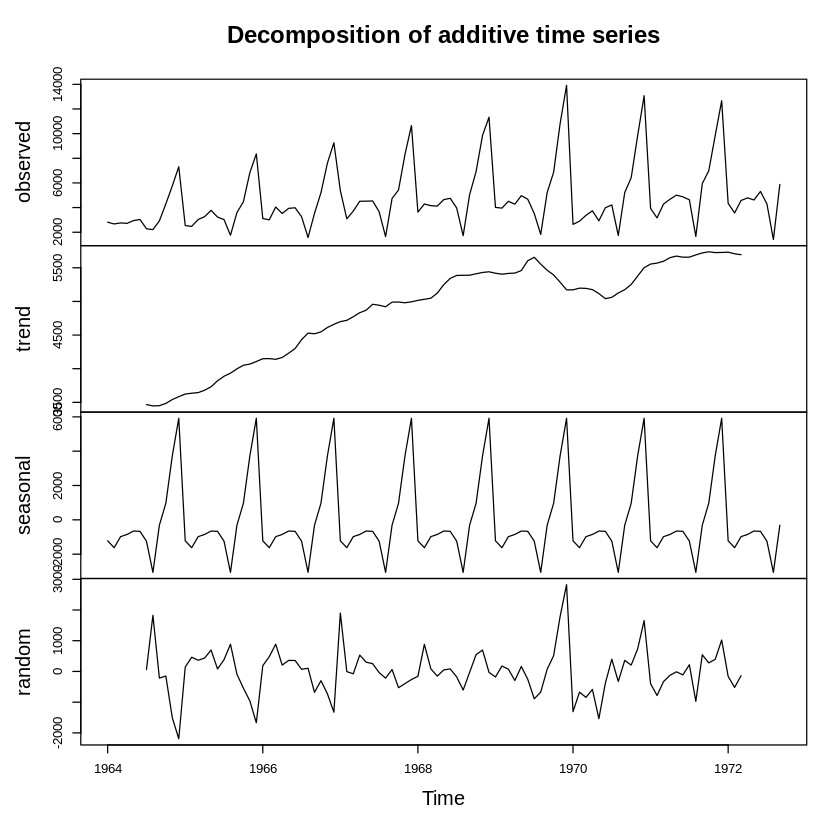

In [35]:
plot(comp)

<font color = 'red'>**Nhận xét:**</font>
#####**1. data có trend**
- Ta thấy: từ 1965 - giữa năm 1969, data có xu hướng đi lên, 
tuy nhiên từ giữa năm 1969 đến giữa năm 1970, data có xu hướng đi xuống
sau đó, từ data lại có xu hướng đi lên

#####**2. data có tính seasonal**
- seasonal (mùa vụ): tăng giảm khá đều, tăng giảm theo đúng chu kỳ của nó

Ngoài ra, resid (giá trị của random) tăng giảm bất thường, có những đột biến, có biến động bất thường (Irregular fluctuation) là những thay đổi đột ngột ngẫu
nhiên và không thể đoán trước


### **6.Thực hiện việc dự báo và vẽ biểu đồ so sánh với thực tiễn.**

### **Forecasting**

In [76]:
df.timeseries.forecasts <- HoltWinters(log(df.timeseries))
print(df.timeseries.forecasts)

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log(df.timeseries))

Smoothing parameters:
 alpha: 0.162663
 beta : 0
 gamma: 0.6420031

Coefficients:
            [,1]
a    8.596349543
b    0.008502999
s1   0.278865220
s2   0.654169414
s3   0.905836600
s4  -0.263166356
s5  -0.435401308
s6  -0.196514965
s7  -0.147258515
s8  -0.172332010
s9  -0.074040272
s10 -0.225615800
s11 -1.250803544
s12  0.087625298


<font color = 'red'>**Nhận xét:**</font>
- alpha ~ 0.16: thấp, cho thấy giá trị hiện tại phụ thuộc vào các giá trị gần đây và các giá trị trong quá khứ xa.
- beta ~ 0: độ dốc của trend không cập nhập trong thời gian qua
- gamma ~ 0.64: ảnh hưởng của yếu tố mùa tại thời điểm hiện tại có phụ thuộc vào các giá trị gần

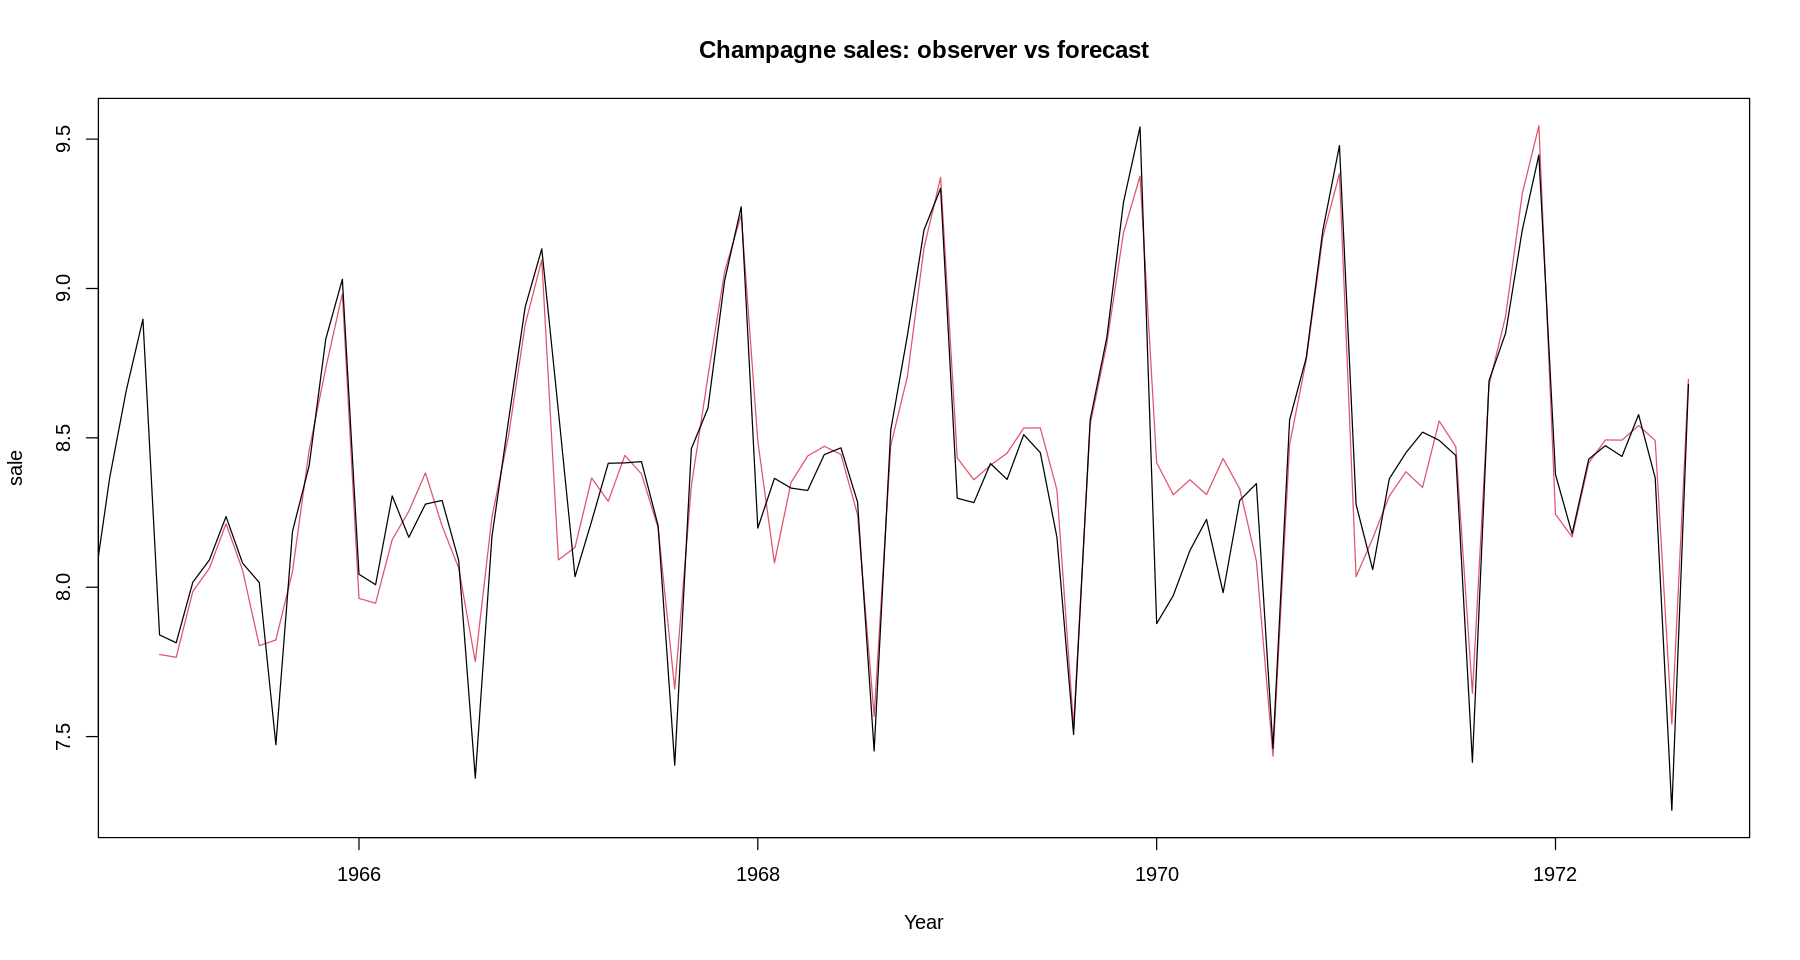

In [59]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot(df.timeseries.forecasts, 
    main = "Champagne sales: observer vs forecast",
    xlab='Year', ylab='sale'
)

In [58]:
sse = df.timeseries.forecasts$SSE
print(paste('RMSE = ', (sse/length(df))^0.5))

[1] "RMSE =  1.05384154927207"


In [61]:
# RMSE ~ 1 so với range khoảng từ 0 - 9.5 => có thể chấp nhận

<font color = 'red'>**Nhận xét:**</font>
- Nhìn chung, giá trị và xu hướng của dữ liệu dự đoán khá khớp với dữ liệu thực tế

### **7. Dự đoán số tiền champagne bán được của 9 tháng tiếp theo từ tháng 10-1972 đến tháng 06-1973.**

In [42]:
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [43]:
library('forecast')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "Next 9 months:"
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 1972       8.883718 8.685766 9.081669 8.580977 9.186459
Nov 1972       9.267525 9.066972 9.468078 8.960805 9.574245
Dec 1972       9.527695 9.324573 9.730817 9.217047 9.838343
Jan 1973       8.367195 8.161537 8.572853 8.052668 8.681722
Feb 1973       8.203463 7.995300 8.411627 7.885105 8.521822
Mar 1973       8.450853 8.240213 8.661492 8.128708 8.772997
Apr 1973       8.508612 8.295526 8.721698 8.182725 8.834499
May 1973       8.492042 8.276536 8.707547 8.162455 8.821628
Jun 1973       8.598836 8.380939 8.816734 8.265591 8.932081


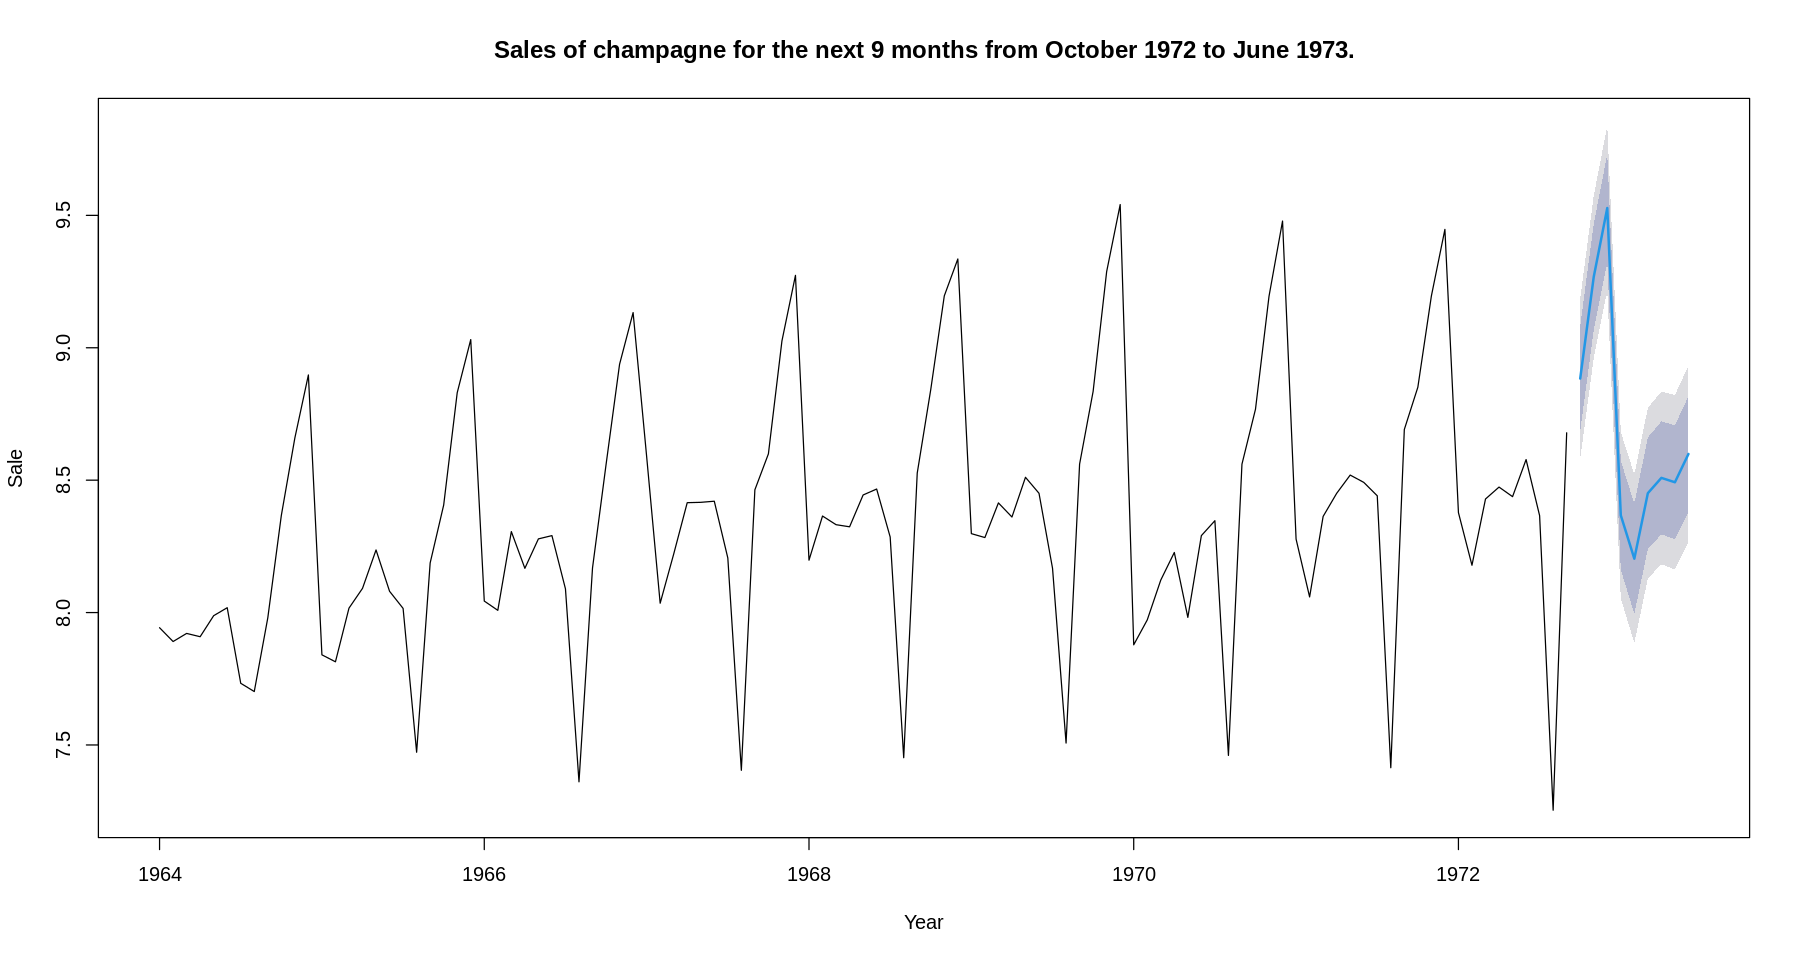

In [78]:
df.timeseries.forecasts2 <- forecast:::forecast.HoltWinters(df.timeseries.forecasts, h=9)
print("Next 9 months:")
print(df.timeseries.forecasts2)

plot(df.timeseries.forecasts2, main = "Sales of champagne for the next 9 months from October 1972 to June 1973.",
    xlab='Year', ylab='Sale')

In [65]:
# trả về giá trị cũ trước khi log
y = data.frame(df.timeseries.forecasts2)
y$Forecase = exp(y$Point.Forecas)

In [79]:
y

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95,Forecase
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Oct 1972,8.883718,8.685766,9.081669,8.580977,9.186459,7213.559
Nov 1972,9.267525,9.066972,9.468078,8.960805,9.574245,10588.512
Dec 1972,9.527695,9.324573,9.730817,9.217047,9.838343,13734.898
Jan 1973,8.367195,8.161537,8.572853,8.052668,8.681722,4303.548
Feb 1973,8.203463,7.995300,8.411627,7.885105,8.521822,3653.582
Mar 1973,8.450853,8.240213,8.661492,8.128708,8.772997,4679.060
Apr 1973,8.508612,8.295526,8.721698,8.182725,8.834499,4957.278
May 1973,8.492042,8.276536,8.707547,8.162455,8.821628,4875.810
Jun 1973,8.598836,8.380939,8.816734,8.265591,8.932081,5425.342
